# World Happiness Report Project

#### Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# K-Nearest Neighbors regressor
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

# Support Vector Regression
from sklearn.svm import SVR

# Ensemble algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('World_Happiness_Score_Report.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Display last 5 rows of the dataframe
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
# Display shape of the dataframe
df.shape

(158, 12)

In [6]:
# Display the names of the columns 
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
# Checking for the null values 
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
# Display dataframe's details, such as column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
# Display summary statistics of the dataframe
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### Data Visualization

In [10]:
sns.set(style = "whitegrid")

Univariate Analysis

In [11]:
# Choose the variable for analysis
variable_to_analyze = "Happiness Score"

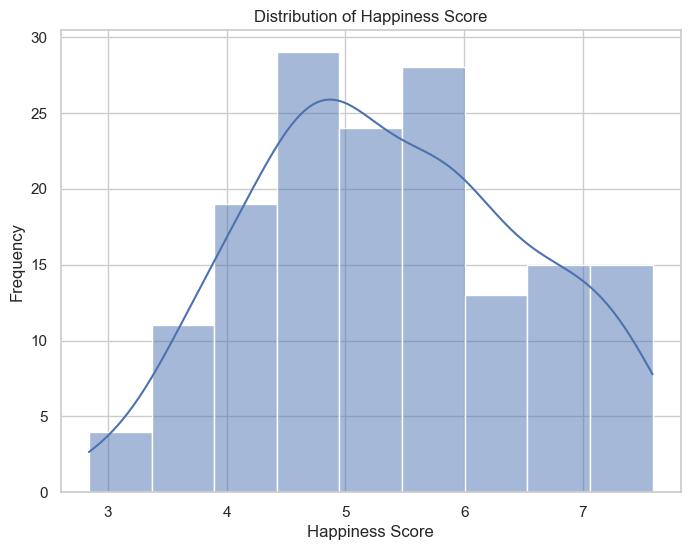

In [12]:
# Create a histogram
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = variable_to_analyze, kde = True)
plt.title(f"Distribution of {variable_to_analyze}")
plt.xlabel(variable_to_analyze)
plt.ylabel("Frequency")
plt.show()

Bivariate Analysis

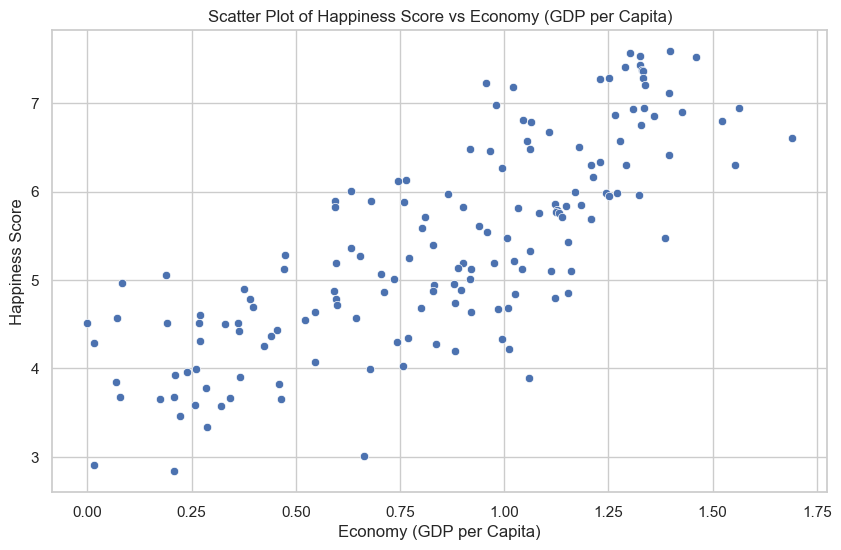

In [13]:
# Scatter plot of Happiness Score vs Economy (GDP per Capita)
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'Economy (GDP per Capita)', y='Happiness Score')
plt.title("Scatter Plot of Happiness Score vs Economy (GDP per Capita)")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()

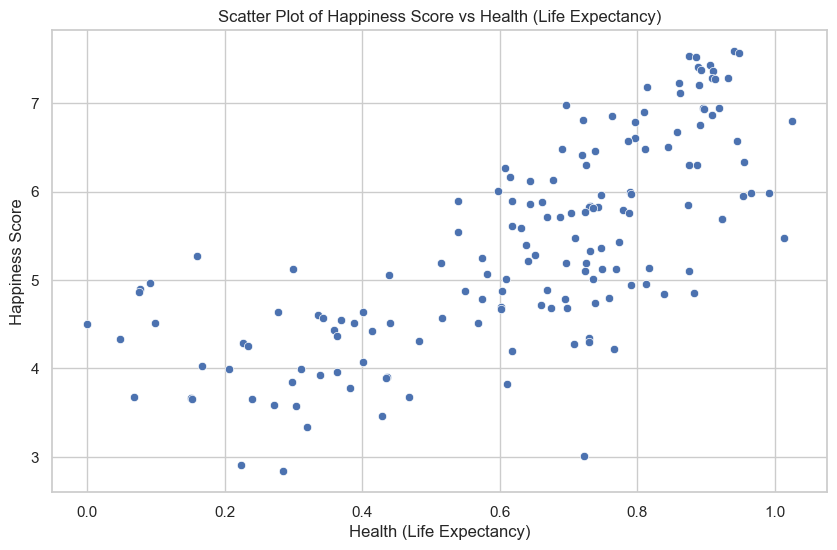

In [14]:
# Scatter plot of Happiness Score vs Health (Life Expectancy)
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x ='Health (Life Expectancy)', y = 'Happiness Score')
plt.title("Scatter Plot of Happiness Score vs Health (Life Expectancy)")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()

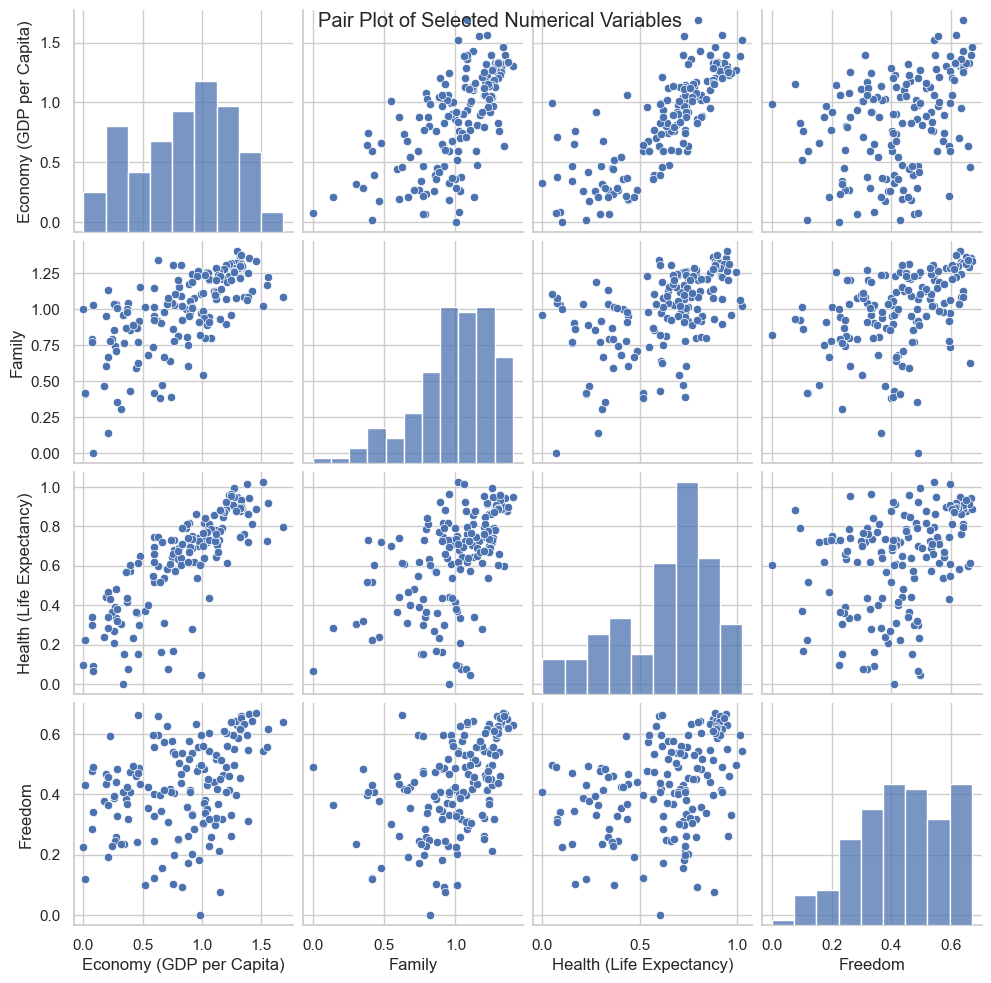

In [15]:
# Pair plot of selected numerical variables
sns.pairplot(df, vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom'])
plt.suptitle("Pair Plot of Selected Numerical Variables")
plt.show()

#### Data Cleaning

In [16]:
# Dropping columns containing unique values
df.drop(['Country', 'Happiness Rank'], axis = 1, inplace = True)

In [17]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
# Converting categorical columns into numeric columns
encoder = LabelEncoder()
df['Region'] = encoder.fit_transform(df['Region'])
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


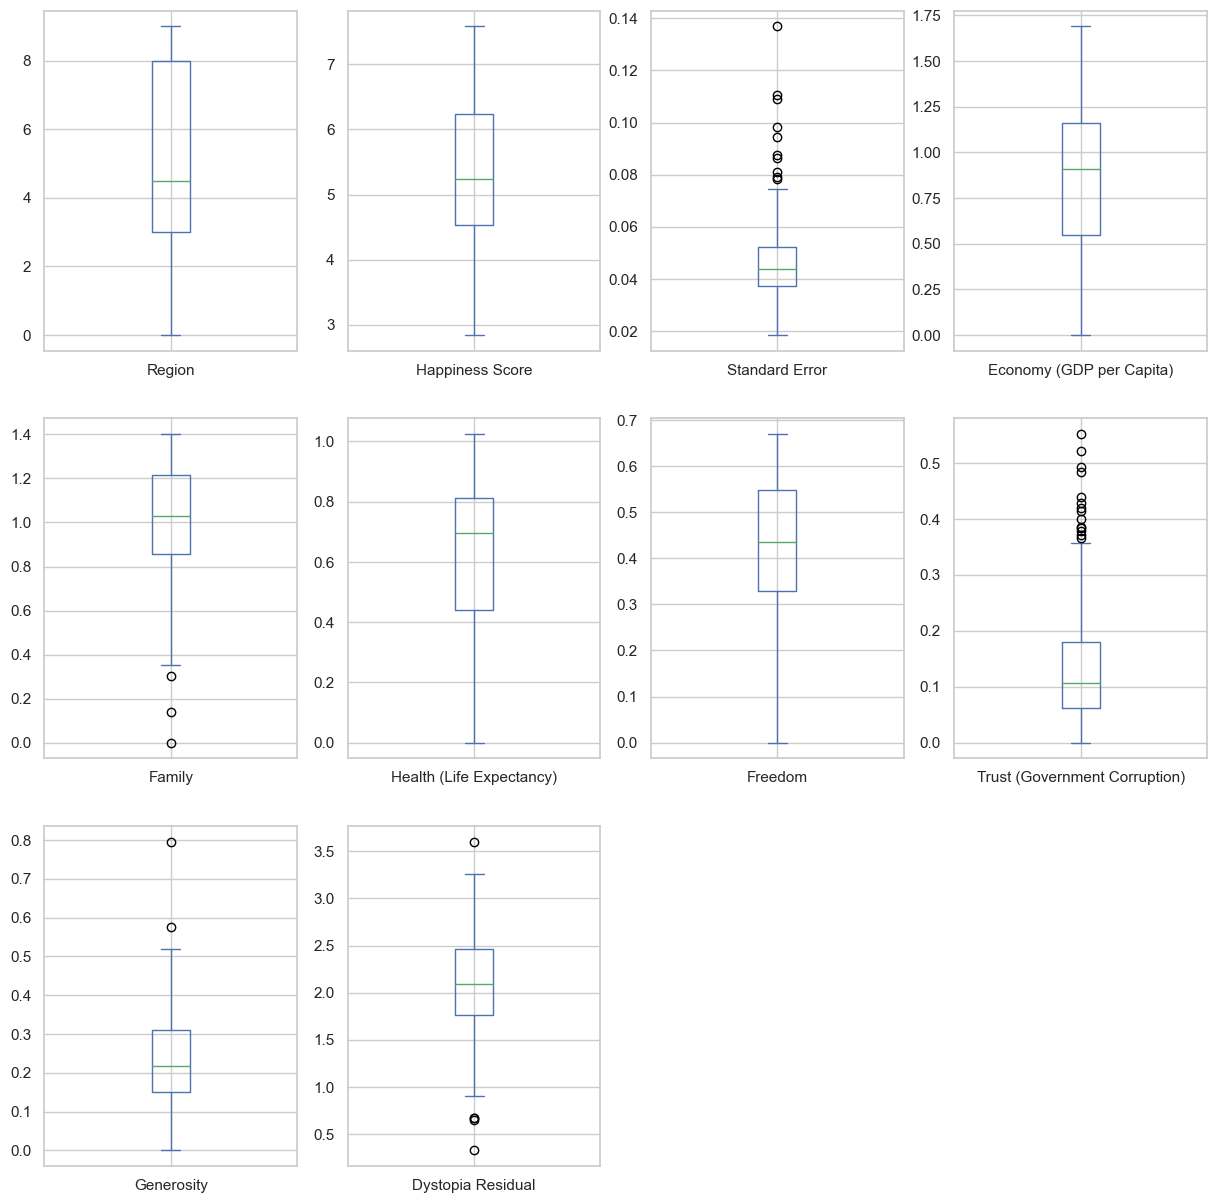

In [19]:
# Cheking for the outliers

# Using boxplot
df.plot(kind = 'box', subplots = True, figsize = (15, 15), layout = (3,4))
plt.show()

In [20]:
# Using Z-Score
z_score = abs(zscore(df))
z_score

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.300256,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.040302,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,0.965117,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.965117,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.375441,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,0.965117,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


Outliers are present in the dataset

In [21]:
# Removing Outliers
z = 3
df1= df[(z_score < z).all(axis = 1)]
df1.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [22]:
df1.shape

(149, 10)

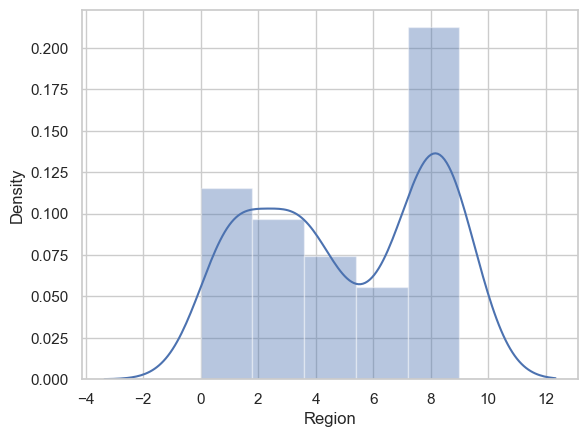

In [23]:
# Checking for the skewness

# Using distplot

sns.distplot(df1['Region'])
plt.show()

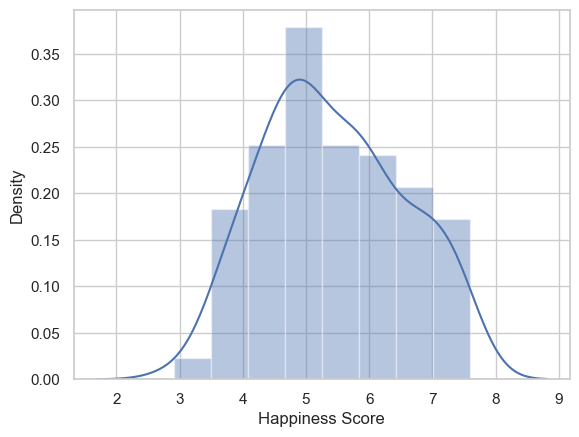

In [24]:
sns.distplot(df1['Happiness Score'])
plt.show()

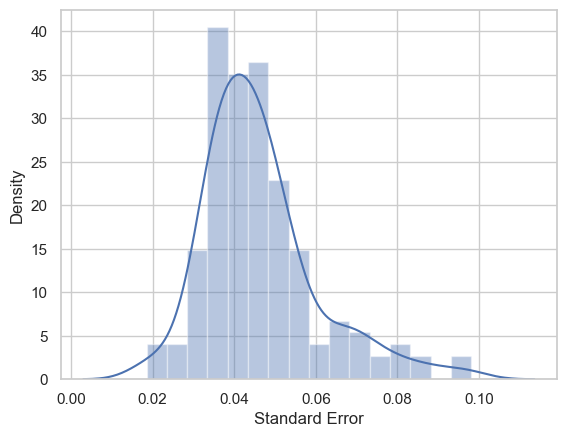

In [25]:
sns.distplot(df1['Standard Error'])
plt.show()

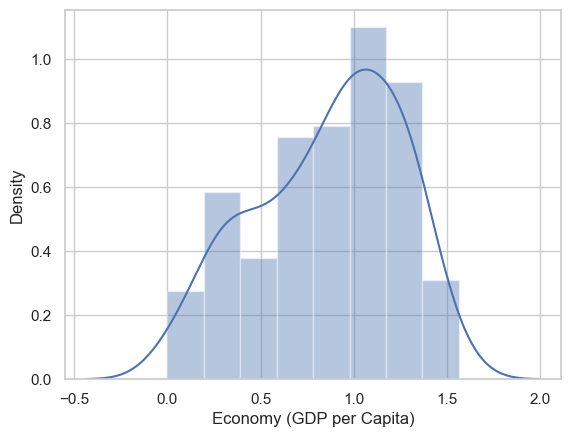

In [26]:
sns.distplot(df1['Economy (GDP per Capita)'])
plt.show()

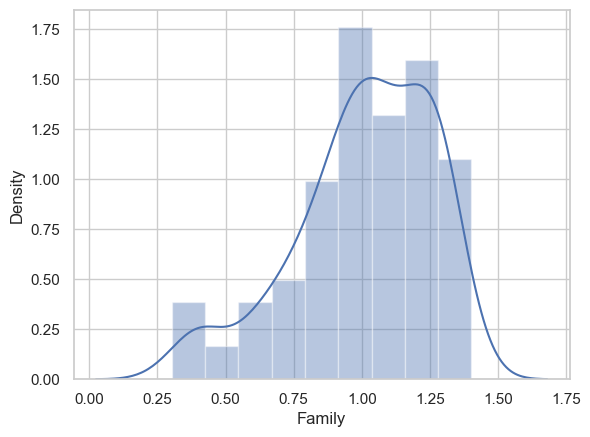

In [27]:
sns.distplot(df1['Family'])
plt.show()

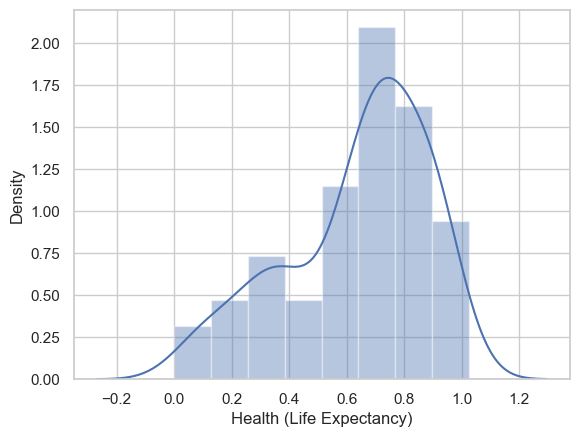

In [28]:
sns.distplot(df1['Health (Life Expectancy)'])
plt.show()

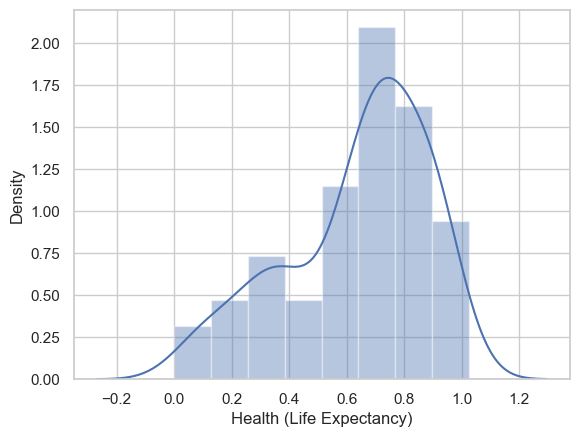

In [29]:
sns.distplot(df1['Health (Life Expectancy)'])
plt.show()

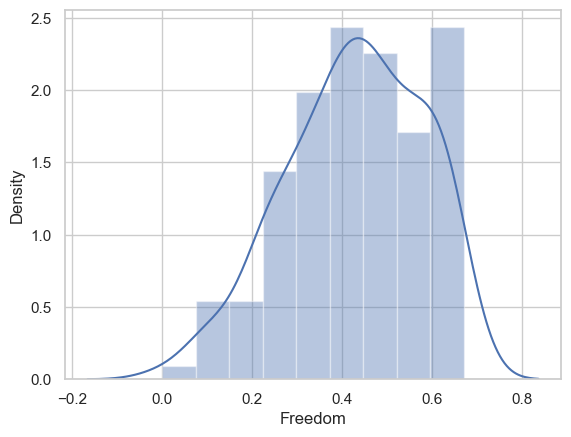

In [30]:
sns.distplot(df1['Freedom'])
plt.show()

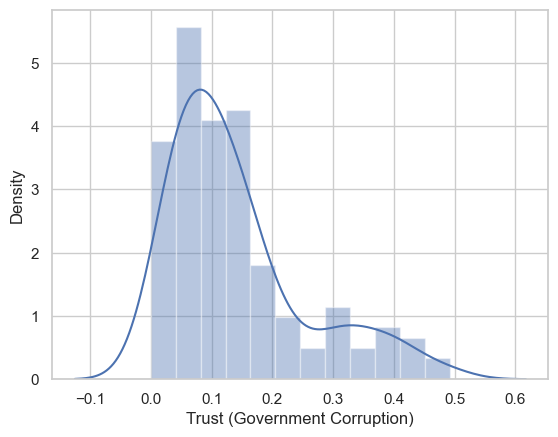

In [31]:
sns.distplot(df1['Trust (Government Corruption)'])
plt.show()

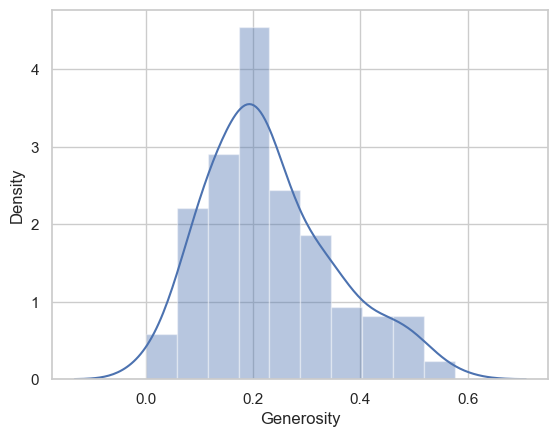

In [32]:
sns.distplot(df1['Generosity'])
plt.show()

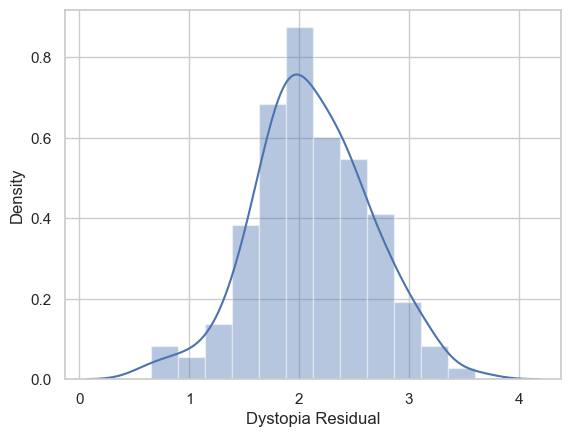

In [33]:
sns.distplot(df1['Dystopia Residual'])
plt.show()

In [34]:
# Using skew() method
df1.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Standard Error (Positive skewness)

Family (Negative skewness)

Health (Life Expectancy) (Negative skewness)

Trust (Government Corruption)(Positive skewness)

Generosity (Positive skewness)

These columns have positive or negative skewness therefore, there is a need of reducing skewness of these columns.

In [35]:
# List of columns with high skewness
high_skewed_columns = ["Standard Error", "Family", "Health (Life Expectancy)", "Trust (Government Corruption)", "Generosity"]
transformed_df1 = df1.copy()
transformed_df2 = df1.copy()
transformed_df3 = df1.copy()
transformed_df4 = df1.copy()
transformed_df5 = df1.copy()
transformed_df6 = df1.copy()
transformed_df7 = df1.copy()

# Apply different transformations

# Log Transformation
transformed_df1[high_skewed_columns] = np.log1p(df1[high_skewed_columns])

# Square Root Transformation
transformed_df2[high_skewed_columns] = np.sqrt(df1[high_skewed_columns])

# Box-Cox Transformation
for column in high_skewed_columns:
    transformed_df3[column], lambda_value = boxcox(df1[column] + 1)  # Adding 1 to handle zero and negative values

# Reciprocal Transformation
transformed_df4[high_skewed_columns] = 1 / (df1[high_skewed_columns] + 1)  # Adding 1 to handle zero values

# Exponential Transformation
transformed_df5[high_skewed_columns] = np.exp(df1[high_skewed_columns])

# Power Transformation
transformed_df6[high_skewed_columns] = df1[high_skewed_columns] ** 2
transformed_df7[high_skewed_columns] = df1[high_skewed_columns] ** 3


In [36]:
# Checking skewness after after applying transformations
transformed_df1.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.193808
Economy (GDP per Capita)        -0.390657
Family                          -1.131254
Health (Life Expectancy)        -1.028015
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

In [37]:
transformed_df2.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   0.717347
Economy (GDP per Capita)        -0.390657
Family                          -1.182069
Health (Life Expectancy)        -1.433237
Freedom                         -0.400867
Trust (Government Corruption)    0.437253
Generosity                      -0.285799
Dystopia Residual               -0.021144
dtype: float64

In [38]:
transformed_df3.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.390657
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.400867
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual               -0.021144
dtype: float64

In [39]:
transformed_df4.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                  -1.144808
Economy (GDP per Capita)        -0.390657
Family                           1.479188
Health (Life Expectancy)         1.330807
Freedom                         -0.400867
Trust (Government Corruption)   -0.920634
Generosity                      -0.210105
Dystopia Residual               -0.021144
dtype: float64

In [40]:
transformed_df5.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.295329
Economy (GDP per Capita)        -0.390657
Family                          -0.294183
Health (Life Expectancy)        -0.345097
Freedom                         -0.400867
Trust (Government Corruption)    1.492962
Generosity                       0.935789
Dystopia Residual               -0.021144
dtype: float64

In [41]:
transformed_df6.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   2.186300
Economy (GDP per Capita)        -0.390657
Family                          -0.239633
Health (Life Expectancy)        -0.056315
Freedom                         -0.400867
Trust (Government Corruption)    2.242465
Generosity                       1.625649
Dystopia Residual               -0.021144
dtype: float64

In [42]:
transformed_df7.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   3.066855
Economy (GDP per Capita)        -0.390657
Family                           0.161171
Health (Life Expectancy)         0.435458
Freedom                         -0.400867
Trust (Government Corruption)    2.983545
Generosity                       2.375215
Dystopia Residual               -0.021144
dtype: float64

Boxcox transformation reduced the skewness to the maximum extent therefore, the columns in transformed_df3 exhibit reduced skewness.

In [43]:
df2 = transformed_df3

In [44]:
df2.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.022404,1.39651,5.563268,2.318521,0.66557,0.153634,0.207111,2.51738
1,9,7.561,0.027366,1.30232,6.042359,2.346570,0.62877,0.093490,0.265247,2.70201
2,9,7.527,0.022064,1.32548,5.661625,2.038287,0.64938,0.159122,0.227561,2.49204
3,9,7.522,0.024194,1.45900,5.400993,2.081193,0.66973,0.147439,0.229994,2.46531
4,5,7.427,0.022969,1.32629,5.329139,2.165608,0.63297,0.142463,0.272943,2.45176


In [45]:
# Checking the correalation coefficient matrix
correlation_coefficient = df2.corr()
correlation_coefficient

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.145850,-0.074226,-0.224928,-0.098025,-0.258828,0.101335,0.211648,0.320795,-0.059494
Happiness Score,-0.145850,1.000000,-0.239566,0.773577,0.753635,0.756464,0.585066,0.404730,0.231255,0.528334
Standard Error,-0.074226,-0.239566,1.000000,-0.234615,-0.187401,-0.320227,-0.211683,-0.109699,-0.137493,0.012498
Economy (GDP per Capita),-0.224928,0.773577,-0.234615,1.000000,0.644572,0.841707,0.376780,0.239674,-0.015619,0.026936
Family,-0.098025,0.753635,-0.187401,0.644572,1.000000,0.566374,0.519695,0.236854,0.178888,0.137864
Health (Life Expectancy),-0.258828,0.756464,-0.320227,0.841707,0.566374,1.000000,0.404945,0.199159,0.120640,0.042297
Freedom,0.101335,0.585066,-0.211683,0.376780,0.519695,0.404945,1.000000,0.487711,0.430167,0.058596
Trust (Government Corruption),0.211648,0.404730,-0.109699,0.239674,0.236854,0.199159,0.487711,1.000000,0.265170,0.104621
Generosity,0.320795,0.231255,-0.137493,-0.015619,0.178888,0.120640,0.430167,0.265170,1.000000,-0.020253
Dystopia Residual,-0.059494,0.528334,0.012498,0.026936,0.137864,0.042297,0.058596,0.104621,-0.020253,1.000000


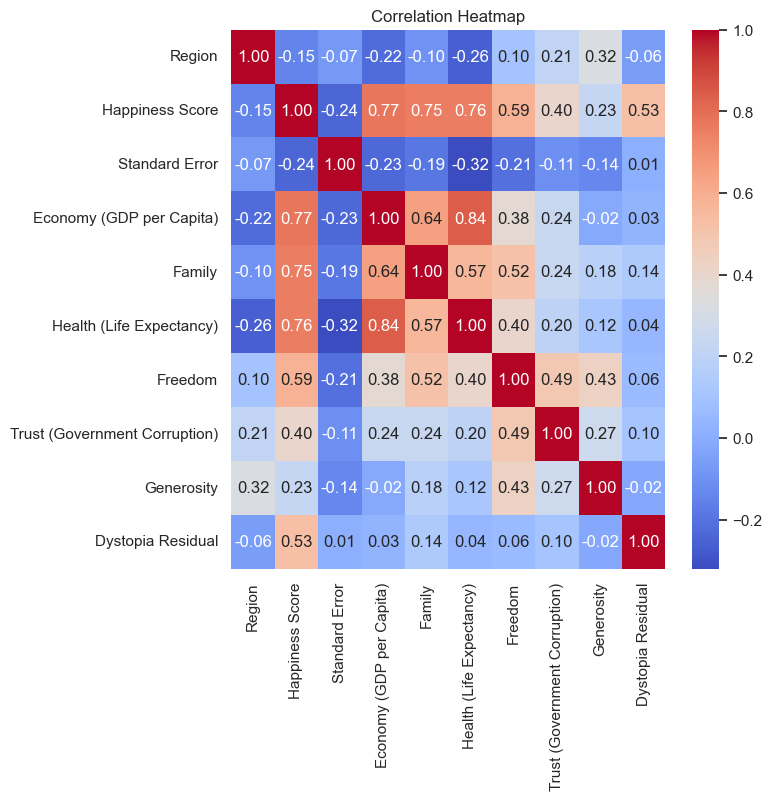

In [46]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (7,7))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Feature Scaling

In [47]:
# Extracting features and target from dataset
features = df2.drop('Happiness Score', axis = 1)
target = df2['Happiness Score']

# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [48]:
df3 = pd.DataFrame(scaled_df, columns = features.columns[:])
df3.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.296837,-0.950337,1.381916,1.658880,1.469636,1.583704,1.817625,0.659579,0.756876
1,1.296837,0.378562,1.138324,2.009125,1.511292,1.338953,0.329676,1.562604,1.109300
2,1.296837,-1.041401,1.198220,1.730785,1.053469,1.476027,1.953400,0.977226,0.708507
3,1.296837,-0.471124,1.543526,1.540248,1.117188,1.611371,1.664359,1.015018,0.657485
4,-0.026647,-0.799032,1.200315,1.487718,1.242549,1.366887,1.541247,1.682150,0.631620


#### Checking the Variance Inflation factor

In [49]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = df3.columns
vif_data["VIF"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]

# Print the VIF data
print(vif_data)

                        Features       VIF
0                         Region  1.329496
1                 Standard Error  1.158740
2       Economy (GDP per Capita)  4.580721
3                         Family  2.106639
4       Health (Life Expectancy)  4.142430
5                        Freedom  1.971686
6  Trust (Government Corruption)  1.420456
7                     Generosity  1.496279
8              Dystopia Residual  1.050035


There is no need to drop any feature as there isn't much multicollinearity between the features.

In [50]:
# Storing features and target in X and y
X = df3
y = target

#### Finding the best random state

In [51]:
# Finding the best random state
max_r2_score = 0
max_random_state = 0
for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2score = r2_score(y_test, pred)
    if r2score > max_r2_score:
        max_r2_score = r2score
        max_random_state = i
print("Best R2 score is", max_r2_score, "at random state", max_random_state)

Best R2 score is 0.9982790789964587 at random state 37


#### Splitting the dataset into training and testing sets

In [52]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = max_random_state)

#### Different Models for predicting Happiness Score

In [53]:
# Using different regression models for prdicting Happiness Score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_lr)
msqe = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2score = r2_score(y_test, y_pred_lr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.04384573557226293
mean_squared_error: 0.0026295376391801866
root_mean_absolute_error: 0.051279017533297055
r2_score: 0.9982790789964587


In [54]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_lasso)
msqe = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2score = r2_score(y_test, y_pred_lasso)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 1.090313888888889
mean_squared_error: 1.5766551419727972
root_mean_absolute_error: 1.2556492909936265
r2_score: -0.031854006854317385


In [55]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_ridge)
msqe = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2score = r2_score(y_test, y_pred_ridge)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.04235663748896317
mean_squared_error: 0.002553500642048121
root_mean_absolute_error: 0.05053217432535553
r2_score: 0.9983288419903255


In [56]:
# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_knn)
msqe = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2score = r2_score(y_test, y_pred_knn)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.34605925925925923
mean_squared_error: 0.1812093185185186
root_mean_absolute_error: 0.42568687848995135
r2_score: 0.8814061766489328


In [57]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_svr)
msqe = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2score = r2_score(y_test, y_pred_svr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.1843361670860732
mean_squared_error: 0.05866949133451769
root_mean_absolute_error: 0.24221785923939979
r2_score: 0.9616033030292992


In [58]:
# Decision Tree Regressor
dtr_model = DecisionTreeRegressor(criterion = 'mse', random_state = 7)
dtr_model.fit(X_train, y_train)
y_pred_dtr = dtr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_dtr)
msqe = mean_squared_error(y_test, y_pred_dtr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2score = r2_score(y_test, y_pred_dtr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.4669555555555555
mean_squared_error: 0.33397842222222235
root_mean_absolute_error: 0.5779086625256817
r2_score: 0.7814252692306072


In [59]:
# Random Forest Regressor 
rfr_model = RandomForestRegressor(random_state = 1)
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_rfr)
msqe = mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2score = r2_score(y_test, y_pred_rfr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.29778600000000055
mean_squared_error: 0.13471844126888902
root_mean_absolute_error: 0.3670401085288759
r2_score: 0.9118324865597847


In [60]:
# Extra Trees Regressor
etc_model = ExtraTreesRegressor()
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_etc)
msqe = mean_squared_error(y_test, y_pred_etc)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_etc))
r2score = r2_score(y_test, y_pred_etc)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.2503919999999998
mean_squared_error: 0.09734119580444439
root_mean_absolute_error: 0.3119955060645015
r2_score: 0.9362943105001844


In [61]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_gbr)
msqe = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2score = r2_score(y_test, y_pred_gbr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.20472131954173262
mean_squared_error: 0.0743012064558255
root_mean_absolute_error: 0.2725824764283748
r2_score: 0.9513730076067096


In [62]:
# AdaBoost Regressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train, y_train)
y_pred_abr = abr_model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred_abr)
msqe = mean_squared_error(y_test, y_pred_abr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_abr))
r2score = r2_score(y_test, y_pred_abr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.36273743776442363
mean_squared_error: 0.18231673306243174
root_mean_absolute_error: 0.42698563566287767
r2_score: 0.8806814207375319


In [63]:
# XGBoost Regressor
xgbr_model = xgb.XGBRegressor(random_state = 1)
xgbr_model.fit(X_train, y_train)
y_pred_xgbr = xgbr_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred_xgbr)
msqe = mean_squared_error(y_test, y_pred_xgbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgbr))
r2score = r2_score(y_test, y_pred_xgbr)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.24952874459160695
mean_squared_error: 0.10928354383826762
root_mean_absolute_error: 0.3305806162470323
r2_score: 0.9284785495630589


In [64]:
# Bagging Regressor
br_model = BaggingRegressor()
br_model.fit(X_train, y_train)
y_pred_br = br_model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred_br)
msqe = mean_squared_error(y_test, y_pred_br)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_br))
r2score = r2_score(y_test, y_pred_br)

print("mean_absolute_error:", mse)
print("mean_squared_error:", msqe)
print("root_mean_absolute_error:", rmse)
print("r2_score:", r2score)

mean_absolute_error: 0.2552755555555555
mean_squared_error: 0.10284248755555549
root_mean_absolute_error: 0.32069064151539484
r2_score: 0.9326939480714318


#### Cross Validatation

In [65]:
# Applying Cross Validation Methods on each model

# For Linear Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_lr) - cv_score.mean())

[0.95835967 0.8885896  0.8769189  0.83330787 0.91504677]
0.8944445616070642
Difference between R2 score and cross validation score: 0.10383451738939453


In [66]:
# For Lasso Regression
cv_score = cross_val_score(lasso_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_lasso) - cv_score.mean())

[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
Difference between R2 score and cross validation score: 23.06767768569943


In [67]:
# For Ridge Regression
cv_score = cross_val_score(ridge_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_ridge) - cv_score.mean())

[0.95876356 0.88153885 0.87829593 0.84283434 0.90157193]
0.892600921966147
Difference between R2 score and cross validation score: 0.10572792002417841


In [68]:
# For K-Nearest Neighbors 
cv_score = cross_val_score(knn_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_knn) - cv_score.mean())

[-7.64559713 -4.45053155 -1.69510813 -7.74889421 -4.99486498]
-5.306999199183662
Difference between R2 score and cross validation score: 6.188405375832595


In [69]:
# For Support Vector Regressor
cv_score = cross_val_score(svr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_svr) - cv_score.mean())

[-11.62302779   0.36072068   0.72521009  -0.20464906  -5.02120525]
-3.152590266215703
Difference between R2 score and cross validation score: 4.114193569245002


In [70]:
# For Decision Tree Regressor
cv_score = cross_val_score(dtr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_dtr) - cv_score.mean())

[ -6.01529562 -11.56632485  -5.79704809 -12.34614169  -5.71968433]
-8.288898916993634
Difference between R2 score and cross validation score: 9.07032418622424


In [71]:
# For Random Forest Regressor
cv_score = cross_val_score(rfr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_rfr) - cv_score.mean())

[-7.83037939 -0.56900672 -0.78722562 -2.04068809 -6.18043577]
-3.4815471181239177
Difference between R2 score and cross validation score: 4.393379604683703


In [72]:
# For Extra Trees Regressor
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_etc) - cv_score.mean())

[-7.49217615  0.05208383 -1.15306227 -1.80466649 -5.712429  ]
-3.2220500173663345
Difference between R2 score and cross validation score: 4.158344327866519


In [73]:
# For Gradient Boosting Regressor
cv_score = cross_val_score(gbr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_gbr) - cv_score.mean())

[-4.00983974  0.04388463 -1.15313059 -2.68366705 -4.35775389]
-2.4321013262148257
Difference between R2 score and cross validation score: 3.3834743338215354


In [74]:
# For AdaBoost Regressor
cv_score = cross_val_score(abr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_abr) - cv_score.mean())

[-9.61090837 -5.88121306 -3.28617431 -4.90942685 -8.22119385]
-6.381783286019749
Difference between R2 score and cross validation score: 7.262464706757281


In [75]:
# For XGBoost Regressor
cv_score = cross_val_score(xgbr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_xgbr) - cv_score.mean())

[-5.49317334 -1.5003631  -1.35877458 -4.19703268 -3.62315438]
-3.2344996141344753
Difference between R2 score and cross validation score: 4.1629781636975345


In [76]:
# For Bagging Regressor
cv_score = cross_val_score(br_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between R2 score and cross validation score:", r2_score(y_test, y_pred_br) - cv_score.mean())

[-7.50082514 -1.50435097 -1.96934241 -2.40414775 -5.92675594]
-3.861084442952479
Difference between R2 score and cross validation score: 4.793778391023911


Linear Regression model has given least difference between R2 score and cross validation score that is 0.10383451738939453

Linear Regression model is the best model.

#### Hyper Parameter Tuning

In [77]:
# Hyper parameter tuning
param_grid = {
    'normalize': [True, False],
    'fit_intercept': [True, False]
}

In [78]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LinearRegression(), param_grid, cv = 5, scoring = 'r2')

In [79]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [80]:
grid_search_cv.best_params_

{'fit_intercept': True, 'normalize': True}

In [81]:
# Creating final model
final_model = LinearRegression(fit_intercept = True, normalize = True)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
r2score = r2_score(y_test, pred_values)
print(r2score * 100)

99.82790789964588


In [82]:
# Saving the model 
joblib.dump(final_model, "World_Happiness_Report_Project.pkl")

['World_Happiness_Report_Project.pkl']

In [83]:
# Loading the saved model
model = joblib.load("World_Happiness_Report_Project.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [84]:
# Compairing actual and predicted values
actual_values = np.array(y_test)
df = pd.DataFrame()
df['Actual Values'] = actual_values
df['Predicted Values'] = predicted_values
df

,Actual Values,Predicted Values
0,4.949,4.911026
1,4.786,4.772769
2,7.527,7.430567
3,4.800,4.832856
4,6.575,6.623081
5,5.890,5.844456
6,4.550,4.496847
7,5.759,5.695380
8,7.406,7.347642
9,4.077,4.065702


In [85]:
# Testing the model
country_details = pd.DataFrame({
    'Region': [2], 
    'Standard Error': [0.04884],       
    'Economy (GDP per Capita)': [1.32548],        
    'Family': [1.32261],
    'Health (Life Expectancy)': [0.90563],        
    'Freedom': [0.66973],        
    'Trust (Government Corruption)': [0.41978],      
    'Generosity': [0.43630],          
    'Dystopia Residual': [2.49204],         
})

In [86]:
# Predicting happiness score
prediction = final_model.predict(country_details)

In [87]:
print("Happines score is", prediction)

Happines score is [7.9084528]
